## <center>Лабораторна робота №1</center>
#### <center>Вибірковий метод та його характеристики</center>

**Мета роботи:**  вивчити методи утворення репрезентативної вибірки.

***
1. Для дослідження візьмемо статистику середньодобової відносної вологості повітря у індійському місті Колката
***

In [421]:
import pandas as pd
df = pd.read_csv('./fiveyearsweatherdata.csv')
analysis_set = df["Relative Humidity"]
analysis_set

0       82.47
1       76.76
2       73.12
3       72.57
4       71.88
        ...  
1821    83.47
1822    79.94
1823    81.38
1824    88.30
1825    82.20
Name: Relative Humidity, Length: 1826, dtype: float64

***
2. Вибираємо 100 випадкових значень
***

In [422]:
import random

n = 100
sequence = random.sample(analysis_set.tolist(), n)
print(sequence)

[88.75, 92.29, 74.64, 73.63, 71.07, 82.96, 71.44, 70.15, 48.91, 87.02, 73.55, 65.98, 60.48, 61.14, 76.21, 74.93, 61.25, 89.62, 72.48, 84.21, 71.44, 54.43, 78.32, 83.22, 69.58, 82.06, 67.26, 69.66, 81.5, 68.36, 65.78, 58.32, 76.09, 78.6, 58.41, 81.42, 65.61, 50.11, 75.3, 83.65, 84.57, 67.1, 73.4, 78.98, 70.75, 94.95, 72.65, 76.2, 86.85, 73.61, 70.06, 73.04, 88.85, 67.12, 73.5, 60.21, 48.93, 92.45, 64.97, 80.93, 81.34, 74.49, 77.85, 76.15, 87.63, 57.27, 84.98, 76.99, 67.28, 69.43, 68.25, 79.99, 66.2, 79.82, 67.56, 90.36, 83.51, 84.32, 74.9, 64.84, 77.69, 54.05, 77.89, 87.07, 86.04, 87.0, 94.28, 90.23, 90.01, 81.88, 78.99, 70.19, 75.23, 63.68, 90.12, 81.88, 77.41, 86.18, 84.07, 59.85]


***
3. Ранжуємо вибірку
***

In [423]:
sequence.sort()
print(sequence)

[48.91, 48.93, 50.11, 54.05, 54.43, 57.27, 58.32, 58.41, 59.85, 60.21, 60.48, 61.14, 61.25, 63.68, 64.84, 64.97, 65.61, 65.78, 65.98, 66.2, 67.1, 67.12, 67.26, 67.28, 67.56, 68.25, 68.36, 69.43, 69.58, 69.66, 70.06, 70.15, 70.19, 70.75, 71.07, 71.44, 71.44, 72.48, 72.65, 73.04, 73.4, 73.5, 73.55, 73.61, 73.63, 74.49, 74.64, 74.9, 74.93, 75.23, 75.3, 76.09, 76.15, 76.2, 76.21, 76.99, 77.41, 77.69, 77.85, 77.89, 78.32, 78.6, 78.98, 78.99, 79.82, 79.99, 80.93, 81.34, 81.42, 81.5, 81.88, 81.88, 82.06, 82.96, 83.22, 83.51, 83.65, 84.07, 84.21, 84.32, 84.57, 84.98, 86.04, 86.18, 86.85, 87.0, 87.02, 87.07, 87.63, 88.75, 88.85, 89.62, 90.01, 90.12, 90.23, 90.36, 92.29, 92.45, 94.28, 94.95]


***
4. Знайдемо розмах вибірки
***

In [424]:
r = round(sequence[-1] - sequence[0], 2)
print(f"Розмах вибірки: {sequence[-1]} - {sequence[0]} = {r}")

Розмах вибірки: 94.95 - 48.91 = 46.04


***

<br>

 <br>

 <br>

 <br>

 <br>

***

## <center>Лабораторна робота №2</center>
#### <center>Створення інтервального статистичного розподілу вибірки, графічні зображення та числові характеристики вибірки</center>

**Мета роботи:** навчитися: створювати інтервальний статистичний розподіл з варіант
вибірки; зображати графічно інтервальний статистичний розподіл (побудова
полігону, гістограми та кумуляти), знаходження моди та медіани за
графічними зображеннями; обчислення числових характеристик ( середнього
зваженого, дисперсії, асиметрії і ексцесу (за потреби)) вибірки.

In [425]:
r = round(sequence[-1] - sequence[0], 2)
print(f"Розмах вибірки: {sequence[-1]} - {sequence[0]} = {r}")

Розмах вибірки: 94.95 - 48.91 = 46.04


Обчислюємо кількість та довжину інтервалів. <br>
TODO: формули інтервалів

In [426]:
import math

m = 1 + 3.3221 * math.log(n, 10)
m = round(m)

k = r / (1 + 3.221 * math.log(n, 10))
k = round(k, 2)

print (f"Кількість інтервалів: m = {m}")
print (f"Довжина інтервалу: k = {k}")

Кількість інтервалів: m = 8
Довжина інтервалу: k = 6.19


In [427]:
x_start = sequence[0] - k / 2
x_start = round(x_start, 2)
print(f"Початок інтервалу: {x_start}")

Початок інтервалу: 45.81


In [428]:
from tabulate import tabulate

range_start = round(x_start, 2)
range_end = round(range_start + k, 2)
interval_table = []
cumm_count_in_range = 0
cumm_freq = 0

def count(list1, l, r):
    return len(list(x for x in list1 if l <= x <= r))

headers = ["i", "Інтервал", "Середини інтервалів", "Частота", "Частість", "Накопичена частота", "Накопичена частість"]
interval_table.append(headers)

for row in range(1, m + 1):
    table_row = []
    
    table_row.append(row)

    row_range = ( range_start, range_end )
    table_row.append(f"{row_range[0]}-{row_range[-1]}")

    range_mid = (row_range[-1] + row_range[0]) / 2
    table_row.append(round(range_mid) if range_mid % 1 == 0 else round(range_mid, 2))

    count_in_range = count(sequence, row_range[0], row_range[-1])
    table_row.append(count_in_range)

    freq = round(count_in_range / n, 3)
    table_row.append(freq)

    cumm_count_in_range += count_in_range
    table_row.append(cumm_count_in_range)

    cumm_freq = round(cumm_freq + freq, 3)
    table_row.append(cumm_freq)

    interval_table.append(table_row)
    range_start = range_end
    range_end = round(range_end + k, 2)

print(tabulate(interval_table, headers='firstrow', tablefmt='fancy_grid'))

╒═════╤═════════════╤═══════════════════════╤═══════════╤════════════╤══════════════════════╤═══════════════════════╕
│   i │ Інтервал    │   Середини інтервалів │   Частота │   Частість │   Накопичена частота │   Накопичена частість │
╞═════╪═════════════╪═══════════════════════╪═══════════╪════════════╪══════════════════════╪═══════════════════════╡
│   1 │ 45.81-52.0  │                 48.91 │         3 │       0.03 │                    3 │                  0.03 │
├─────┼─────────────┼───────────────────────┼───────────┼────────────┼──────────────────────┼───────────────────────┤
│   2 │ 52.0-58.19  │                 55.09 │         3 │       0.03 │                    6 │                  0.06 │
├─────┼─────────────┼───────────────────────┼───────────┼────────────┼──────────────────────┼───────────────────────┤
│   3 │ 58.19-64.38 │                 61.28 │         8 │       0.08 │                   14 │                  0.14 │
├─────┼─────────────┼───────────────────────┼───────────

Побудуємо графіки

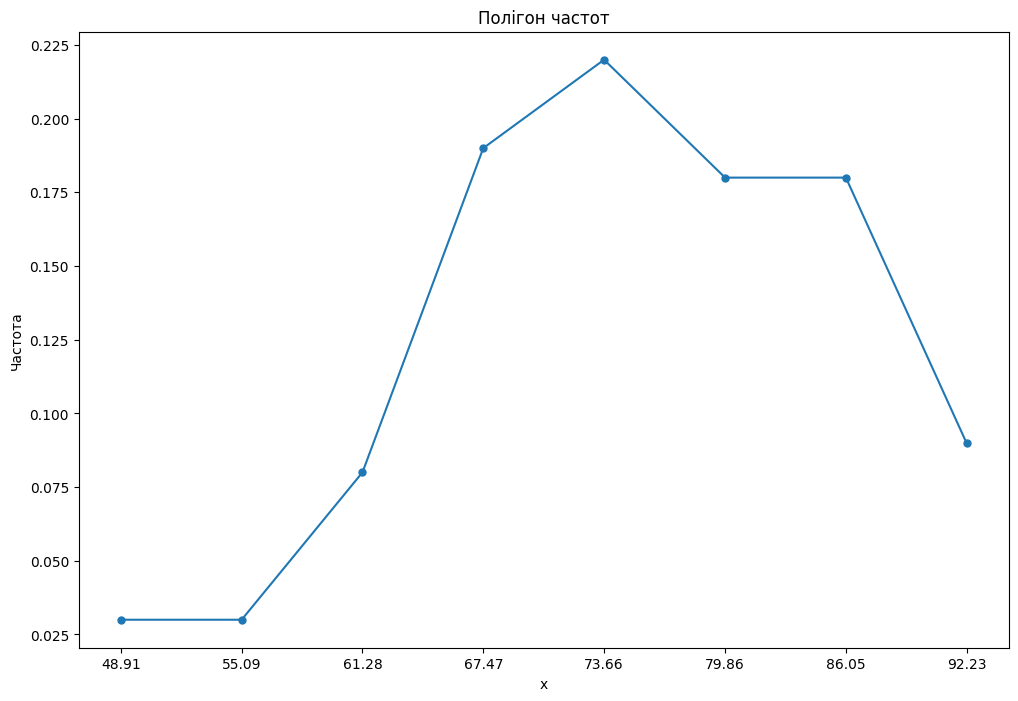

In [429]:
from cProfile import label
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

def getColumnValues(index):
    values = []
    for row in interval_table[1:]:
        values.append(row[index])
    return values

x_polygon = getColumnValues(2)
y_polygon = getColumnValues(4)

plt.plot(x_polygon, y_polygon, marker='o', markersize=5)
plt.xticks(x_polygon)
plt.xlabel('x')
plt.ylabel('Частота')
plt.title("Полігон частот")
plt.show()

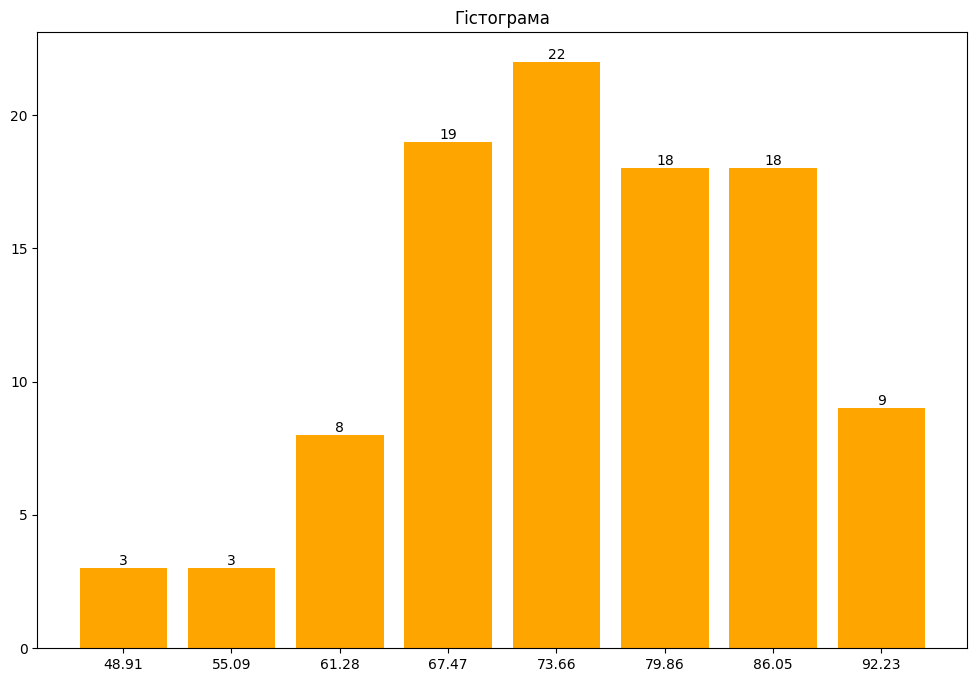

In [430]:
hist_range = (x_start, range_end)
hist_y = getColumnValues(2)
hist_values = getColumnValues(3)
plt.figure(figsize=(12, 8))
# nu, bins, pathces = 
bar_container = plt.bar(hist_y, hist_values, tick_label = hist_y, color='orange', width=5)
plt.bar_label(container=bar_container, label=hist_values)
plt.title("Гістограма")
# plt.xticks(bins)
plt.show()

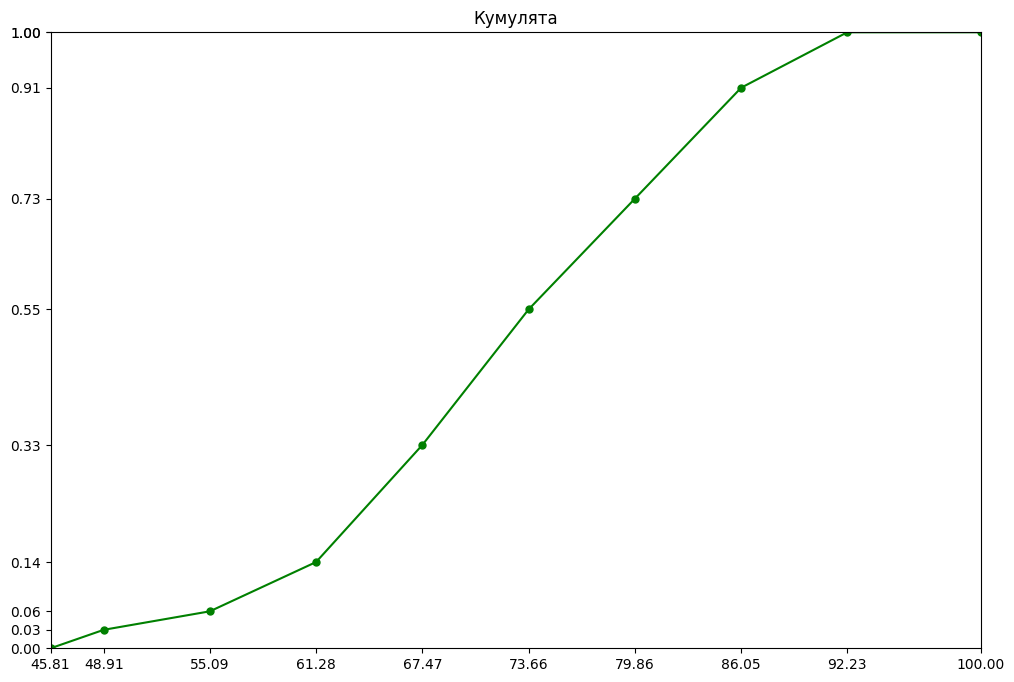

In [431]:
x_cumm = getColumnValues(2)
y_cumm = getColumnValues(6)
x_cumm.insert(0, x_start)
y_cumm.insert(0, 0)
x_cumm.append(100)
y_cumm.append(1)
plt.figure(figsize=(12, 8))
plt.plot(x_cumm, y_cumm, marker='o', markersize=5, color='green')
plt.margins(0)
plt.title('Кумулята')
plt.xticks(x_cumm)
plt.yticks(y_cumm)
plt.show()

Знайдемо моду та медіану

In [432]:
import statistics

mode = statistics.mode(sequence)
print(f'Мода: {mode}')
median = statistics.median_grouped(sequence)
print(f'Медіана: {median}')



Мода: 71.44
Медіана: 74.8


Знайдемо середнє вибіркове та дисперсію

In [433]:
avarage = statistics.fmean(sequence)
print(f'Середнє вибіркове: {round(avarage, 3)}')

avg_values = getColumnValues(2)
avg_count = getColumnValues(3)
variance = 0
for i in range(0, len(avg_values)):
    variance += ((avg_values[i] - avarage) ** 2) * avg_count[i]
variance /= n
print(f'Дисперсія: {round(variance, 3)}')

Середнє вибіркове: 75.059
Дисперсія: 111.467


In [434]:
from math import sqrt

avg_square_variation = sqrt(variance)
print(f"Середнє квадратичне відхилення: {round(avg_square_variation, 3)}")

variation_k = (avg_square_variation / avarage) * n
print(f"Коефіцієнт варіації: {round(variation_k, 3)}%")

Середнє квадратичне відхилення: 10.558
Коефіцієнт варіації: 14.066%


In [435]:
as_k = 0
eksc = 0
for i in range(0, len(avg_values)):
    as_k += ((avg_values[i] - avarage) ** 3) * avg_count[i]
    eksc += ((avg_values[i] - avarage) ** 4) * avg_count[i]
as_k /= (n * avg_square_variation ** 3)
eksc /= (n * avg_square_variation ** 4)
eksc -= 3
print(f"Коефіцієнт асиметрії: {round(as_k, 3)}")


print(f"Ексцес: {round(eksc, 3)}")

Коефіцієнт асиметрії: -0.3
Ексцес: -0.356


#### **Висновок:**
Оскільки коефіцієнт асиметрії від’ємний і близький до нуля, розподіл середньодобової вологості має незначну лівосторонню асиметрію, а оскільки ексцес близький до нуля, то розподіл за крутизною наближається до нормального.